# 导论

机器学习的一个重要的目标就是利用数学模型来理解数据，发现数据中的规律，用作数据的分析和预测。数据通常由一组向量组成，这组向量中的每个向量都是一个样本，我们用$x_i$来表示一个样本，其中$i=1,2,3,...,N$,共N个样本，每个样本$x_i=(x_{i1},x_{i2},...,x_{ip},y_i)$共p+1个维度，前p个维度的每个维度我们称为一个特征，最后一个维度$y_i$我们称为因变量(响应变量)。特征用来描述影响因变量的因素，如：我们要探寻身高是否会影响体重的关系的时候，身高就是一个特征，体重就是一个因变量。通常在一个数据表dataframe里面，一行表示一个样本$x_i$，一列表示一个特征。      
根据数据是否有因变量，机器学习的任务可分为：**有监督学习**和**无监督学习**。

 - 有监督学习：给定某些特征去估计因变量，即因变量存在的时候，我们称这个机器学习任务为有监督学习。如：我们使用房间面积，房屋所在地区，环境等级等因素去预测某个地区的房价。          
   - 无监督学习：给定某些特征但不给定因变量，建模的目的是学习数据本身的结构和关系。如：我们给定某电商用户的基本信息和消费记录，通过观察数据中的哪些类型的用户彼此间的行为和属性类似，形成一个客群。注意，我们本身并不知道哪个用户属于哪个客群，即没有给定因变量。

根据因变量的是否连续，有监督学习又分为**回归**和**分类**：
   - 回归：因变量是连续型变量，如：房价，体重等。
   - 分类：因变量是离散型变量，如：是否患癌症，西瓜是好瓜还是坏瓜等。

In [2]:
#需要使用的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns

Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 1 ('{\\rtf1\\ansi\\ansicpg936\\cocoartf1671\\cocoasubrtf200')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 2 ('{\\fonttbl\\f0\\fnil\\fcharset0 Menlo-Regular;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 3 ('{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;\\red255\\green255\\blue255;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 4 ('{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;\\cssrgb\\c100000\\c100000\\c100000;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 5 ('\\paperw11900\\paperh16840\\margl1440\\margr1440\\vieww10800\\viewh8400\\viewkind0')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 6 ('\\deftab720')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 7 ('\\pard\\pardeftab720\\sl260\\partightenfactor0')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc'

## 1.1 回归

Boston房价数据集，返回的对象有:
   - data:特征X的矩阵(ndarray)
   - target:因变量的向量(ndarray)
   - feature_names:特征名称(ndarray)

In [5]:
from sklearn import datasets
boston = datasets.load_boston()       #返回一个类似字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


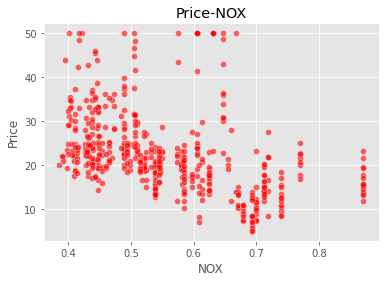

In [3]:
#观察数据分布,散点图
"""
seaborn.scatterplot(x=None, y=None, hue=None,
                    style=None, size=None, data=None, 
                    palette=None, hue_order=None, hue_norm=None,
                    sizes=None, size_order=None, size_norm=None, 
                    markers=True, style_order=None, x_bins=None,
                    y_bins=None, units=None, estimator=None, 
                    ci=95, n_boot=1000, alpha='auto', x_jitter=None,
                    y_jitter=None, legend='brief', ax=None, **kwargs)

"""
sns.scatterplot(x=boston_data['NOX'],y=boston_data['Price'],color='r',alpha=0.6)
plt.title("Price-NOX")
plt.show()

数据给定任务所需要的因变量，因变量为波士顿房价Price是一个连续型变量，所以这是一个回归的例子。

各个特征的相关解释：

   - CRIM：各城镇的人均犯罪率
   - ZN：规划地段超过25,000平方英尺的住宅用地比例
   - INDUS：城镇非零售商业用地比例
   - CHAS：是否在查尔斯河边(=1是)
   - NOX：一氧化氮浓度(/千万分之一)
   - RM：每个住宅的平均房间数
   - AGE：1940年以前建造的自住房屋的比例
   - DIS：到波士顿五个就业中心的加权距离
   - RAD：放射状公路的可达性指数
   - TAX：全部价值的房产税率(每1万美元)
   - PTRATIO：按城镇分配的学生与教师比例
   - B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
   - LSTAT：较低地位人口
   - Price：房价

## 1.2 分类

iris数据集

Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度，4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
iris_data = pd.DataFrame(X,columns=features)
iris_data['target'] = y
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


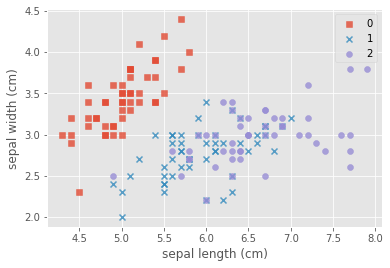

In [9]:
#可视化特征
marker = ['s','x','o']
for index,c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c,"sepal length (cm)"],y =iris_data.loc[y==c,"sepal width (cm)"],alpha=0.8,label=c,marker=marker[c])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

每种不同的颜色和点的样式为一种类型的鸢尾花，数据集有三种不同类型的鸢尾花。因此因变量是一个类别变量，因此通过特征预测鸢尾花类别的问题是一个分类问题。

各个特征的相关解释：
   - sepal length (cm)：花萼长度(厘米)
   - sepal width (cm)：花萼宽度(厘米)
   - petal length (cm)：花瓣长度(厘米)
   - petal width (cm)：花瓣宽度(厘米)

## 1.3 无监督学习
https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets

链接中的函数可生成数据集

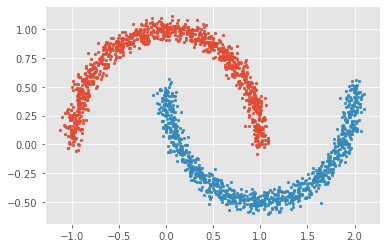

In [7]:
# 生成月牙型非凸集
from sklearn import datasets
x, y = datasets.make_moons(n_samples=2000, shuffle=True,
                  noise=0.05, random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

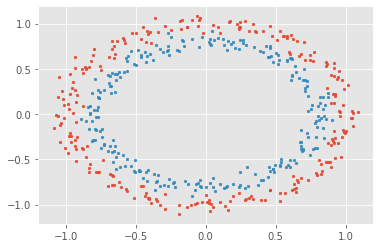

In [19]:
# 圆形
from sklearn import datasets
x, y = datasets.make_circles(n_samples=500, shuffle=True,
                  noise=0.05, random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

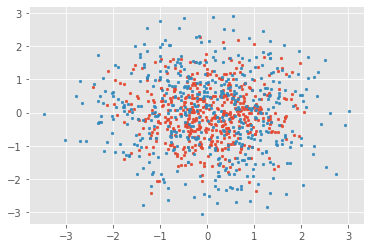

In [34]:
# 产生一个相似的二元分类数据集，有10个维度
from sklearn import datasets
x, y = datasets.make_hastie_10_2(n_samples=1000,random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

## 2. 使用sklearn构建完整的机器学习项目流程

- 明确项目任务：回归/分类
- 收集数据集并选择合适的特征。
- 选择度量模型性能的指标。
- 选择具体的模型并进行训练以优化模型。
- 评估模型的性能并调参。

### 2.1 使用sklearn构建回归项目

数据集：Boston房价  收集数据 选择特征

各个特征的相关解释：
   - CRIM：各城镇的人均犯罪率
   - ZN：规划地段超过25,000平方英尺的住宅用地比例
   - INDUS：城镇非零售商业用地比例
   - CHAS：是否在查尔斯河边(=1是)
   - NOX：一氧化氮浓度(/千万分之一)
   - RM：每个住宅的平均房间数
   - AGE：1940年以前建造的自住房屋的比例
   - DIS：到波士顿五个就业中心的加权距离
   - RAD：放射状公路的可达性指数
   - TAX：全部价值的房产税率(每1万美元)
   - PTRATIO：按城镇分配的学生与教师比例
   - B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
   - LSTAT：较低地位人口
   - Price：房价

In [3]:
from sklearn import datasets
boston = datasets.load_boston()       #返回一个类似字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


（2）选择度量模型性能的指标   损失函数

在这个案例中，选择MSE均方误差

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

metrics.explained_variance_score(y_true, …)

Explained variance regression score function.

metrics.max_error(y_true, y_pred)

max_error metric calculates the maximum residual error.

metrics.mean_absolute_error(y_true, y_pred, *)

Mean absolute error regression loss.

metrics.mean_squared_error(y_true, y_pred, *)

Mean squared error regression loss.

metrics.mean_squared_log_error(y_true, y_pred, *)

Mean squared logarithmic error regression loss.

metrics.median_absolute_error(y_true, y_pred, *)

Median absolute error regression loss.

metrics.mean_absolute_percentage_error(…)

Mean absolute percentage error regression loss.

metrics.r2_score(y_true, y_pred, *[, …])

R^2 (coefficient of determination) regression score function.

metrics.mean_poisson_deviance(y_true, y_pred, *)

Mean Poisson deviance regression loss.

metrics.mean_gamma_deviance(y_true, y_pred, *)

Mean Gamma deviance regression loss.

metrics.mean_tweedie_deviance(y_true, y_pred, *)

Mean Tweedie deviance regression loss.

（3）选择具体的模型并进行训练 

线性回归模型

一种回归模型，通过将输入特征进行线性组合输出连续值。

回归分析是一种预测性的建模技术，它研究的是因变量（目标）和自变量（特征）之间的关系。这种技术通常用于预测分析，时间序列模型以及发现变量之间的因果关系。通常使用曲线/线来拟合数据点，目标是使曲线到数据点的距离差异最小。而线性回归就是回归问题中的一种，线性回归假设目标值与特征之间线性相关，即满足一个多元一次方程。

$y_i$ = b+$w^Tx_i$

多元线性回归问题（multiple linear regression），线性约束由多个解释变量构成。

y=$b_0$+$w_1$$x_1$+$w_2$$x_2$+.....+$w_n$$x_n$

最小二乘估计

我们需要衡量真实值$y_i$与线性回归模型的预测值$w^Tx_i$之间的差距，在这里我们和使用二范数的平方和L(w)来描述这种差距


In [16]:
'''
linear_model.LinearRegression(*[, …])

Ordinary least squares Linear Regression.
'''
from sklearn import linear_model    #sklearn中的线性回归
lin_reg = linear_model.LinearRegression()   
lin_reg.fit(X,y)   #输入特征X和因变量y进行训练
print("模型系数:",lin_reg.coef_)      # 输出模型的系数
print("模型得分:",lin_reg.score(X,y)) #输出模型的决定系数R^2

模型系数: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
模型得分: 0.7406426641094095


- 线性回归的推广

因为模型的形式本身是线性的，无法表达数据中的非线性关系，需要推广线性回归模型使之推广后的模型更能表达非线性的关系。

(a) 多项式回归：        
   为了体现因变量和特征的非线性关系，一个很自然而然的想法就是将标准的线性回归模型：             
   $$
   y_i = w_0 + w_1x_i + \epsilon_i
   $$               
   换成一个多项式函数：          
   $$
   y_i = w_0 + w_1x_i + w_2x_i^2 + ...+w_dx_i^d + \epsilon
   $$  

   如果d取的越大，多项式曲线就会越光滑，置信区间会明显增大，导致稳定性下降。  

In [35]:
'''
多项式回归 PolynomialFeatures

sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C'):               
   - 参数：         
   degree：特征转换的阶数。                       
   interaction_onlyboolean：是否只包含交互项，默认False 。              
   include_bias：是否包含截距项，默认True。           
   order：str in {‘C’, ‘F’}, default ‘C’，输出数组的顺序。

   interaction_onlybool, default=False
If true, only interaction features are produced: features that are products of at most distinct input features
如果为true，则只生成交互特性：这些特性最多是不同输入特性的产物

'''

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [36]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [37]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

（b）广义可加模型(GAM)

广义可加模型GAM实际上是线性模型推广至非线性模型的一个框架，在这个框架中，每一个变量都用一个非线性函数来代替，但是模型本身保持整体可加性。

标准的线性回归模型：           
   $$
   y_i = w_0 + w_1x_{i1} +...+w_px_{ip} + \epsilon_i 
   $$                 
   GAM模型框架：                  
   $$
   y_i = w_0 + \sum\limits_{j=1}^{p}f_{j}(x_{ij}) + \epsilon_i
   $$            

In [42]:
from pygam import LinearGAM
gam = LinearGAM().fit(boston_data[boston.feature_names],y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    103.2423
Link Function:                     IdentityLink Log Likelihood:                                 -1589.7653
Number of Samples:                          506 AIC:                                             3388.0152
                                                AICc:                                            3442.7649
                                                GCV:                                               13.7683
                                                Scale:                                              8.8269
                                                Pseudo R-Squared:                                   0.9168
Feature Function                  Lam

 - **回归树：**  

Regression Tree      
                           
   基于树的回归方法主要是依据分层和分割的方式将特征空间划分为一系列简单的区域。对某个给定的待预测的自变量，用他所属区域中训练集的平均数或者众数对其进行预测。由于划分特征空间的分裂规则可以用树的形式进行概括，因此这类方法称为决策树方法。决策树由结点(node)和有向边(diredcted edge)组成。结点有两种类型：内部结点(internal node)和叶结点(leaf node)。内部结点表示一个特征或属性，叶结点表示一个类别或者某个值。区域$R_1,R_2$等称为叶节点，将特征空间分开的点为内部节点。  

   决策树实际上是将空间用超平面进行划分的一种方法，每次分割的时候，都将当前的空间一分为二， 这样使得每一个叶子节点都是在空间中的一个不相交的区域，在进行决策的时候，会根据输入样本每一维feature的值，一步一步往下，最后使得样本落入N个区域中的一个（假设有N个叶子节点）。

   既然是决策树，那么必然会存在以下两个核心问题：如何选择划分点？如何决定叶节点的输出值？
   
   一个回归树对应着输入空间（即特征空间）的一个划分以及在划分单元上的输出值。分类树中，我们采用信息论中的方法，通过计算选择最佳划分点。而在回归树中，采用的是启发式的方法。假如我们有n个特征，每个特征有$s_{i}(i \in(1, n))$个取值，那我们遍历所有特征，尝试该特征所有取值，对空间进行划分，直到取到特征j的取值s，使得损失函数最小，这样就得到了一个划分点。

   ![jupyter](./img/Regresssion_tree.png)


#### 关于回归树与传统方法
如果特征变量与因变量的关系能很好的用线性关系来表达，那么线性回归通常有着不错的预测效果，拟合效果则优于不能揭示线性结构的回归树。反之，如果特征变量与因变量的关系呈现高度复杂的非线性，那么树方法比传统方法更优。

 树模型的优缺点：                 
- 树模型的解释性强，在解释性方面可能比线性回归还要方便。
- 树模型更接近人的决策方式。
- 树模型可以用图来表示，非专业人士也可以轻松解读。
- 树模型可以直接做定性的特征而不需要像线性回归一样哑元化。
- 树模型能很好处理缺失值和异常值，对异常值不敏感，但是这个对线性模型来说却是致命的。
- 树模型的预测准确性一般无法达到其他回归模型的水平，但是改进的方法很多。



In [ ]:
'''
class sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0

- 参数：(列举几个重要的，常用的，详情请看上面的官网)                 
   criterion：{“ mse”，“ friedman_mse”，“ mae”}，默认=“ mse”。衡量分割标准的函数 。                      
   splitter：{“best”, “random”}, default=”best”。分割方式。                    
   max_depth：树的最大深度。               
   min_samples_split：拆分内部节点所需的最少样本数，默认是2。                      
   min_samples_leaf：在叶节点处需要的最小样本数。默认是1。                    
   min_weight_fraction_leaf：在所有叶节点处（所有输入样本）的权重总和中的最小加权分数。如果未提供sample_weight，则样本的权重相等。默认是0。                      
'''
from sklearn.tree import DecisionTreeRegressor    
reg_tree = DecisionTreeRegressor(criterion = "mse",min_samples_leaf = 5)
reg_tree.fit(X,y)
reg_tree.score(X,y)

- 支持向量机回归(SVR) 


In [46]:
'''
class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)

- 重要参数：                   
   kernel：核函数，{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, 默认=’rbf’。             
   degree：多项式核函数的阶数。默认 = 3。                          
   C：正则化参数，默认=1.0。(后面会详细介绍)                   
   epsilon：SVR模型允许的不计算误差的邻域大小。默认0.1。 
'''
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [49]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler  #标准化数据
from sklearn.pipeline import make_pipeline  #使用管道，把预处理和模型形成一个流程

reg_svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
reg_svr.fit(X, y)
reg_svr.score(X,y)

0.7024525421955277

（4）优化基础模型

线性回归模型中的参数w，那么这个数据集我们称为训练数据集，简称训练集

我们在回归问题中使用训练集估计模型的参数的原则一般都是使得我们的损失函数在训练集达到最小值，其实在实际问题中我们是可以让损失函数在训练集最小化为0

我们希望建立的机器学习模型在未知且情况复杂的测试数据上表现优异，需要测试集

需要模型具有泛化能力

还需要避免过拟合等问题

- (a) 训练均方误差与测试均方误差:
 
 均方误差:

 $MSE = \frac{1}{N}\sum\limits_{i=1}^{N}(y_i -\hat{ f}(x_i))^2$，其中$\hat{ f}(x_i)$是样本$x_i$应用建立的模型$\hat{f}$预测的结果。

当我们的模型的训练均方误差达到很小时，测试均方误差反而很大，但是我们寻找的最优的模型是测试均方误差达到最小时对应的模型，因此基于训练均方误差达到最小选择模型本质上是行不同的。模型在训练误差很小，但是测试均方误差很大时，我们称这种情况叫模型的过拟合。

- (b) 偏差-方差的权衡:

   从上图的测试均方误差曲线可以看到：测试均方误差曲线呈现U型曲线，这表明了在测试误差曲线中有两种力量在互相博弈。可以证明：  

$$E\left(y_{0}-\hat{f}\left(x_{0}\right)\right)^{2}=\operatorname{Var}\left(\hat{f}\left(x_{0}\right)\right)+\left[\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)\right]^{2}+\operatorname{Var}(\varepsilon)$$   
    
我们的测试均方误差的期望值可以分解为$\hat{f}(x_0)$的方差、$\hat{f}(x_0)$的偏差平方和误差项$\epsilon$的方差。为了使得模型的测试均方误差达到最小值，也就是同时最小化偏差的平方和方差。由于我们知道偏差平方和方差本身是非负的，因此测试均方误差的期望不可能会低于误差的方差，因此我们称$\operatorname{Var}(\varepsilon)$为建模任务的难度，这个量在我们的任务确定后是无法改变的，也叫做不可约误差。

由于样本抽取具有随机性，我们得到的100个模型不可能参数完全一样，那么这100个模型之间的差异就叫做方差。

我们希望得到一个稳定的模型，也就是在不同的样本集估计的模型都不会相差太大，即要求f的方差越小越好。一般来说，模型的复杂度越高，f的方差就会越大。

模型的偏差是指：为了选择一个简单的模型去估计真实函数所带入的误差。
偏差度量了学习算法的期望预测与真实结果的偏离程度，即刻画了学习算法本身的拟合能力。偏差度量的是单个模型的学习能力，而方差度量的是同一个模型在不同数据集上的稳定性。

“偏差-方差分解”说明：泛化性能是由学习算法的能力、数据的充分性以及学习任务本身的难度所共同决定的。给定学习任务，为了取得好的泛化性能，则需使偏差较小，即能够充分拟合数据，并且使方差较小，即使得数据扰动产生的影响小。

(c) 特征提取：

目标：我们要选择一个测试误差达到最小的模型。
需要对测试误差进行估计，估计的方式有两种：训练误差修正与交叉验证。
- 训练误差修正

先构造一个特征较多的模型使其过拟合，此时训练误差很小而测试误差很大，那这时我们加入关于特征个数的惩罚。因此，当我们的训练误差随着特征个数的增加而减少时，惩罚项因为特征数量的增加而增大，抑制了训练误差随着特征个数的增加而无休止地减小。
数学表达：
$C_p = \frac{1}{N}(RSS  +  2d\hat{\sigma}^2)$，其中d为模型特征个数，$RSS = \sum\limits_{i=1}^{N}(y_i-\hat{f}(x_i))^2$，$\hat{\sigma}^2$ 为模型预测误差的方差的估计值，即残差的方差。                       

AIC赤池信息量准则：$AIC = \frac{1}{d\hat{\sigma}^2}(RSS  +  2d\hat{\sigma}^2)$     
                               
BIC贝叶斯信息量准则：$BIC = \frac{1}{n}(RSS + log(n)d\hat{\sigma}^2)$     

- 交叉验证

交叉验证则是对测试误差的直接估计。交叉验证比训练误差修正的优势在于：能够给出测试误差的一个直接估计。

K折交叉验证：我们把训练样本分成K等分，然后用K-1个样本集当做训练集，剩下的一份样本集为验证集去估计由K-1个样本集得到的模型的精度，这个过程重复K次取平均值得到测试误差的一个估计$CV_{(K)} = \frac{1}{K}\sum\limits_{i=1}^{K}MSE_i$。



In [15]:
"""
特征提取的实例：向前逐步回归
根据AIC准则定义向前逐步回归进行变量筛选
"""
#定义向前逐步回归函数
def forward_select(data,target):
    variate = set(data.columns)   #将字段名转换成字典类型
    variate.remove(target)     #去掉因变量的字段名
    selected = []
    #目前的分数和最好分数初始值都为无穷大（因为AIC越小越好）
    current_score , best_new_score = float('inf'),float('inf')
    while variate:
        aic_with_variate = []
        #逐个遍历自变量
        for candidate in variate:
            #将自变量名连接起来
            formula = "{}~{}".format(target,"+".join(selected+[candidate]))
            #利用ols训练模型得出aic值
            aic = ols(formula=formula,data=data).fit().aic     
            #将第每一次的aic值放进空列表
            aic_with_variate.append((aic,candidate))   
        #降低排序aic值
        aic_with_variate.sort(reverse=True)
        #最好的aic值等于删除列表的最后一个值，以及最好的自变量等于列表最后一个自变量
        best_new_score,best_candidate = aic_with_variate.pop()
        #如果目前的aic值大于最好的aic值
        if current_score>best_new_score:  
            #移除加进来的变量名，即第二次循环时，不考虑此自变量
            variate.remove(best_candidate)  
            #将此自变量作为加进模型中的自变量
            selected.append(best_candidate)  
            #最新的分数等于最好的分数
            current_score=best_new_score  
            #输出最小的aic值
            print("aic is {},continuing!".format(current_score))  
        else:
            print("for selection over!")
            break
    #最终的模型式子
    formula="{}~{}".format(target,"+".join(selected))  
    print("final formula is {}".format(formula))
    model=ols(formula=formula,data=data).fit()
    return(model)

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
forward_select(data=boston_data,target="Price")

aic is 3286.974956900157,continuing!
aic is 3171.5423142992013,continuing!
aic is 3114.0972674193326,continuing!
aic is 3097.359044862759,continuing!
aic is 3069.438633167217,continuing!
aic is 3057.9390497191152,continuing!
aic is 3048.438382711162,continuing!
aic is 3042.274993098419,continuing!
aic is 3040.154562175143,continuing!
aic is 3032.0687017003256,continuing!
aic is 3021.7263878250615,continuing!
for selection over!
final formula is Price~LSTAT+RM+PTRATIO+DIS+NOX+CHAS+B+ZN+CRIM+RAD+TAX


In [17]:
lm=ols("Price~LSTAT+RM+PTRATIO+DIS+NOX+CHAS+B+ZN+CRIM+RAD+TAX",data=boston_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          5.54e-137
Time:                        20:02:33   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
RM             3.8016      0.406      9.356      0.000       3.003       4.600
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
B              0.0093      0.003      3.475      0.001       0.004       0.015
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
（d）压缩估计（正则化）:
我们还可以对回归的系数进行约束或者加罚的技巧对p个特征的模型进行拟合，显著降低模型方差，这样也会提高模型的拟合效果。

将回归系数往零的方向压缩，所以称作压缩估计。

 - 岭回归(L2正则化的例子)：                 
     在线性回归中，我们的损失函数为$J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2$，我们在线性回归的损失函数的基础上添加对系数的约束或者惩罚，即：                           
     $$
     J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2 + \lambda\sum\limits_{j=1}^{p}w_j^2,\;\;其中，\lambda \ge 0\\
     \hat{w} = (X^TX + \lambda I)^{-1}X^TY
     $$              

调节参数$\lambda$的大小是影响压缩估计的关键，$\lambda$越大，惩罚的力度越大，系数则越趋近于0，反之，选择合适的$\lambda$对模型精度来说十分重要。岭回归通过牺牲线性回归的无偏性降低方差，有可能使得模型整体的测试误差较小，提高模型的泛化能力。 

 - Lasso回归(L1正则化的例子)：             
    
    岭回归的一个很显著的特点是：将模型的系数往零的方向压缩，但是岭回归的系数只能呢个趋于0但无法等于0，换句话说，就是无法做特征选择。能否使用压缩估计的思想做到像特征最优子集选择那样提取出重要的特征呢？答案是肯定的！我们只需要对岭回归的优化函数做小小的调整就行了，我们使用系数向量的L1范数替换岭回归中的L2范数：                     
     $$
     J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2 + \lambda\sum\limits_{j=1}^{p}|w_j|,\;\;其中，\lambda \ge 0
     $$         

In [4]:
"""
岭回归实例：
sklearn.linear_model.ridge_regression(X, y, alpha, *, sample_weight=None, solver='auto', max_iter=None, tol=0.001, verbose=0, random_state=None, return_n_iter=False, return_intercept=False, check_input=True)
"""
from sklearn import linear_model
reg_rid = linear_model.Ridge(alpha=.5)
reg_rid.fit(X,y)
reg_rid.score(X,y)

0.739957023371629

In [6]:
"""
Lasso实例分享：
class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'）

 - 重要参数：                
   alpha：正则化强度，1.0代表标准最小二乘。                
   fit_intercept：是否计算模型截距。默认true。                         
   normalize：是否标准化，默认false。                   
   positive：是否强制系数为正，默认false
"""
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 0.5)
lasso.fit(X,y)
lasso.score(X,y)

0.7140164719858566

(e) 降维
